
# <span style="color:rgb(213,80,0)">Score test and fan plot 2.</span>

This file creates Figures A.24\-A.29 and Tables A.11\-A.14

## D2 Data loading

In [1]:
XX=load('D2.txt');
X=XX(:,1:end-1);
y=XX(:,end);
n=length(y);
prin=0;

## Create Figure A.24

D2 yXplot



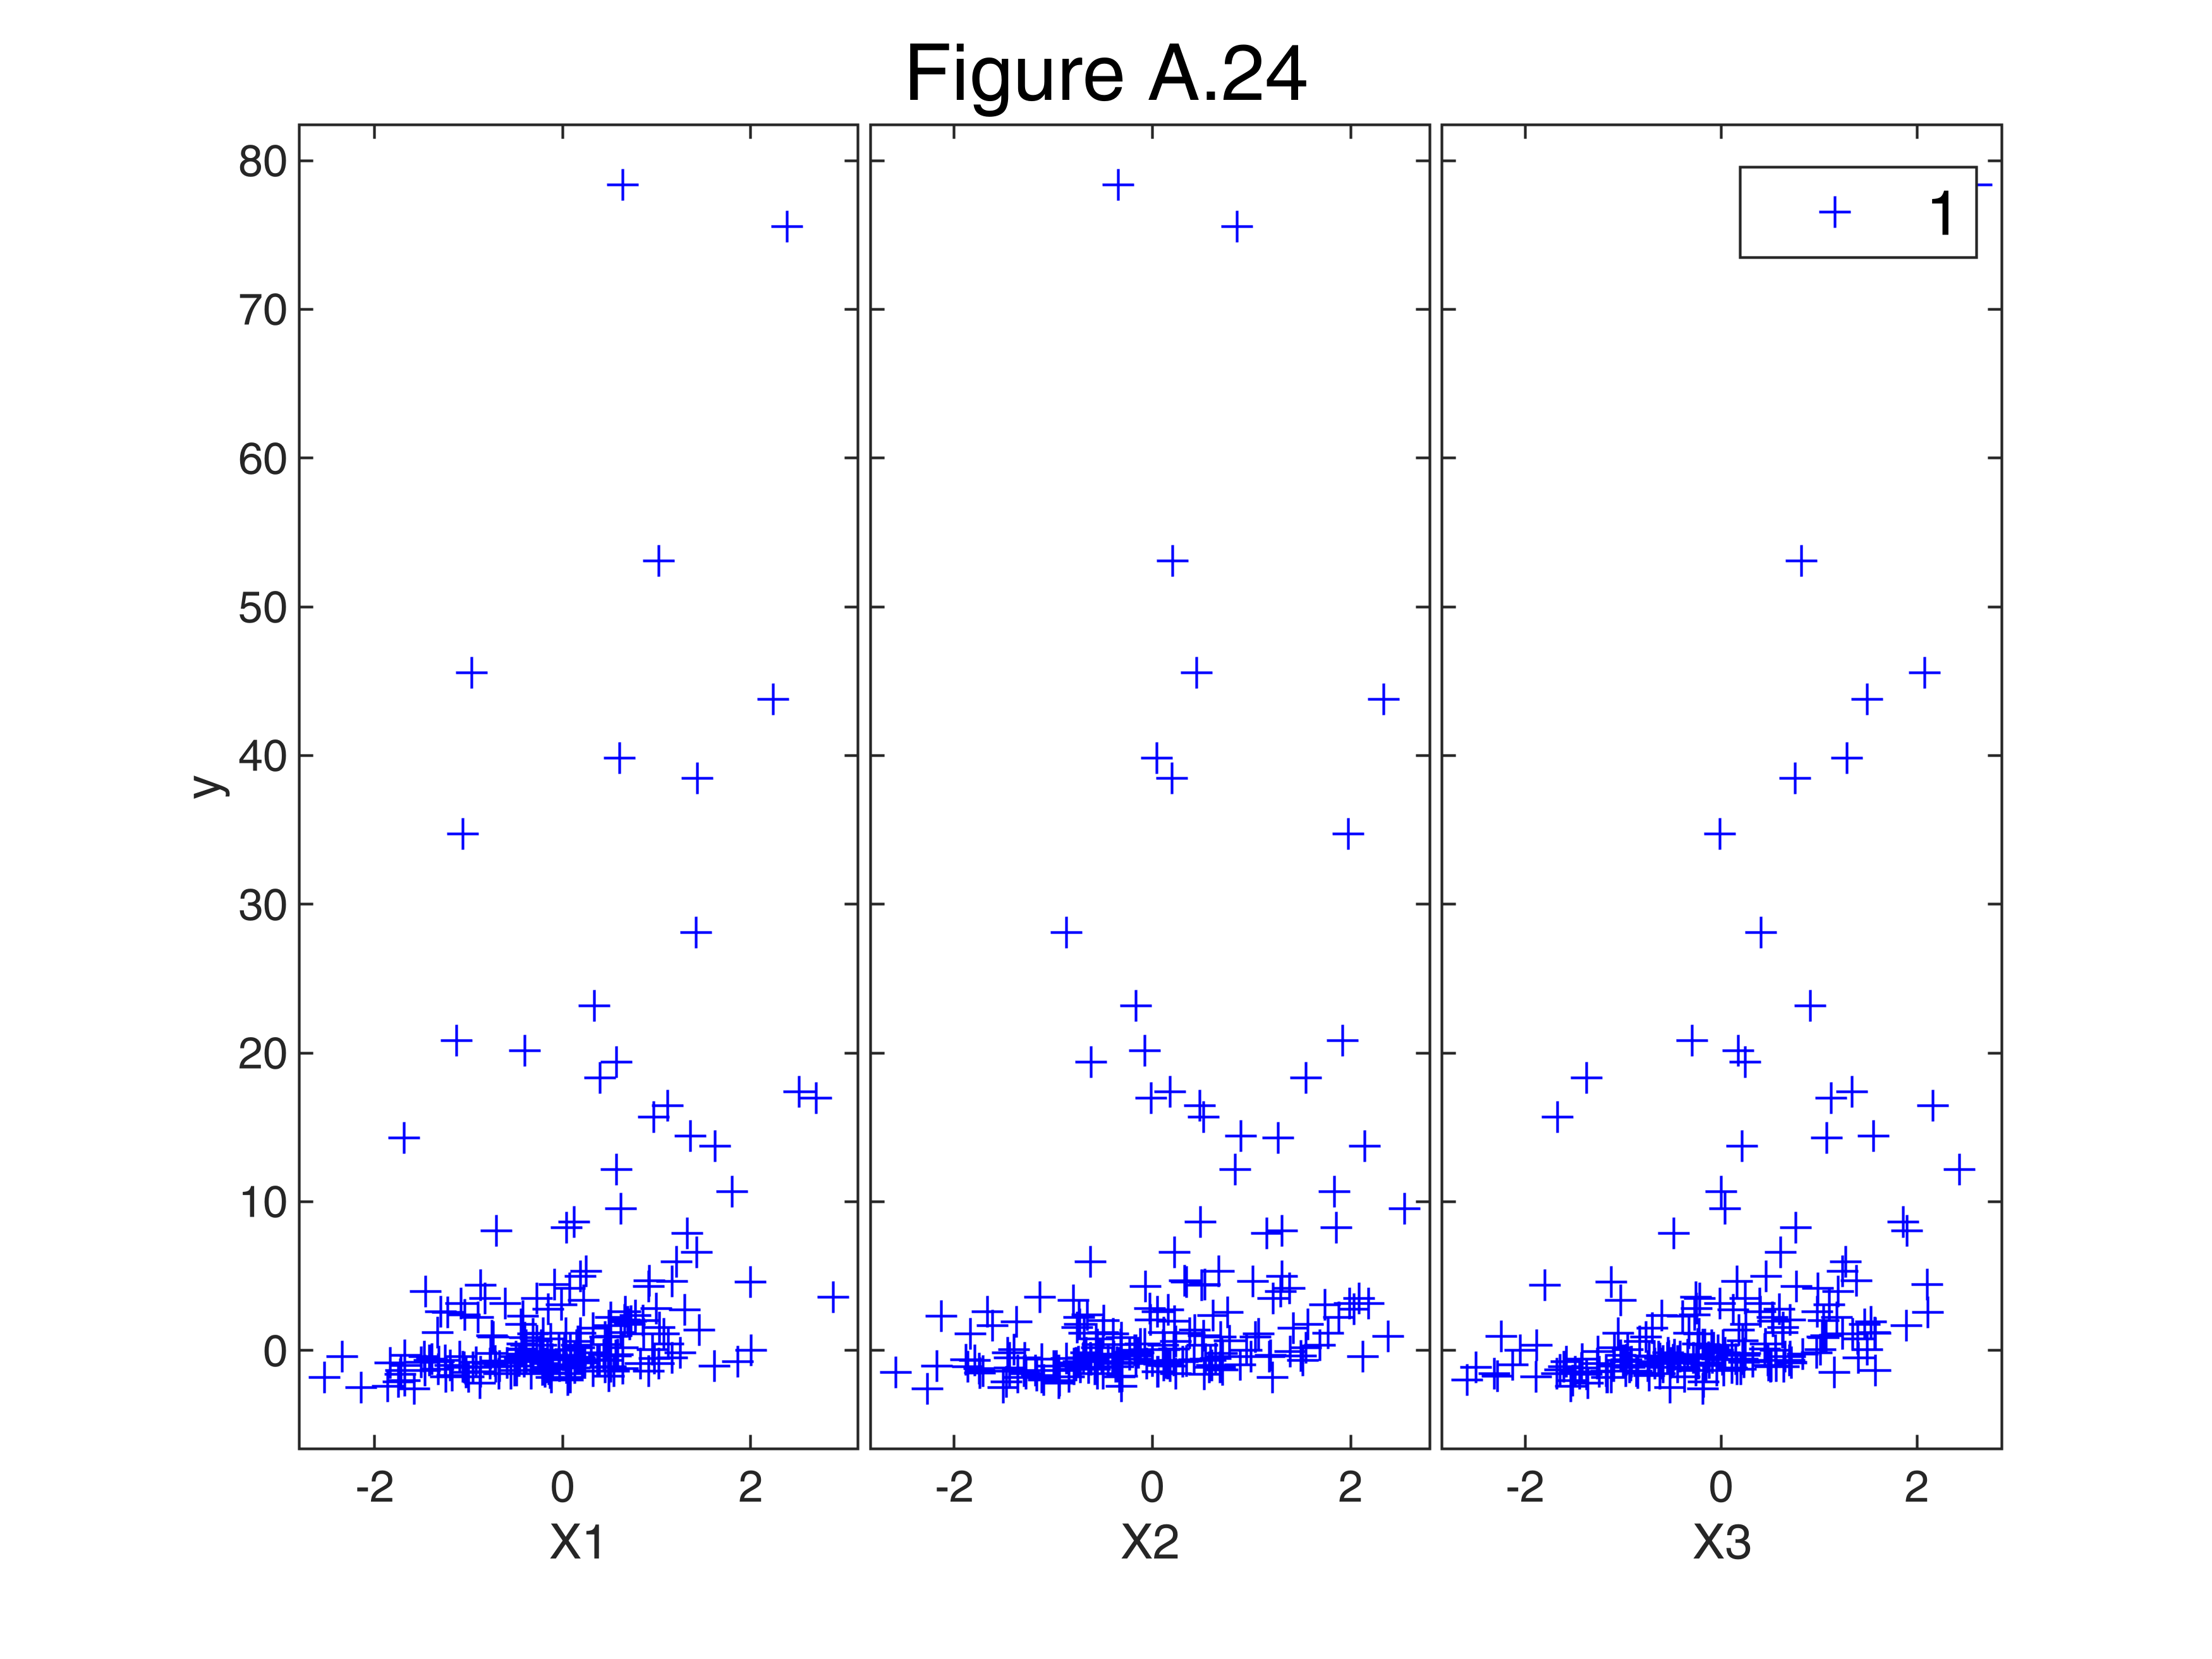

In [2]:
yXplot(y,X,'tag','pl_yini');

if prin==1
    legend off
    print -depsc D2yX.eps
else
    sgtitle('Figure A.24')
    set(gcf,"Name",'Figure A.24')
end

## Create Table A.11

In [3]:
disp('Table A.11: ANOVA in the original scale for y')

Table A.11: ANOVA in the original scale for y

In [4]:
outl=fitlm(X,y);
disp(outl)

Linear regression model:
    y ~ 1 + x1 + x2 + x3
Estimated Coefficients:
                   Estimate      SE       tStat       pValue  
                   ________    _______    ______    __________
    (Intercept)     4.0076     0.69215      5.79    2.7595e-08
    x1              3.4516     0.69676    4.9538    1.5678e-06
    x2              2.6805     0.65036    4.1215    5.5519e-05
    x3              3.6795     0.65861    5.5867    7.6626e-08
Number of observations: 200, Error degrees of freedom: 196
Root Mean Squared Error: 9.78
R-squared: 0.276,  Adjusted R-Squared: 0.265
F-statistic vs. constant model: 24.9, p-value = 1.08e-13

## Create Table A.12

Score test


In [5]:
la=-1:0.25:1;
outS=ScoreYJ(y,X,'la',la);
varn=["lambda" "Score test"];
ScoreT=array2table([la' outS.Score],'VariableNames',varn);
disp("Table A.12")

Table A.12

In [6]:
disp(ScoreT)

    lambda    Score test
    ______    __________
       -1       50.991  
    -0.75       36.046  
     -0.5       21.981  
    -0.25       10.086  
        0      0.13747  
     0.25      -10.512  
      0.5      -25.742  
     0.75      -46.359  
        1      -68.208

## Create Figure A.25 (left panel)

D2 fanplot just one lambda



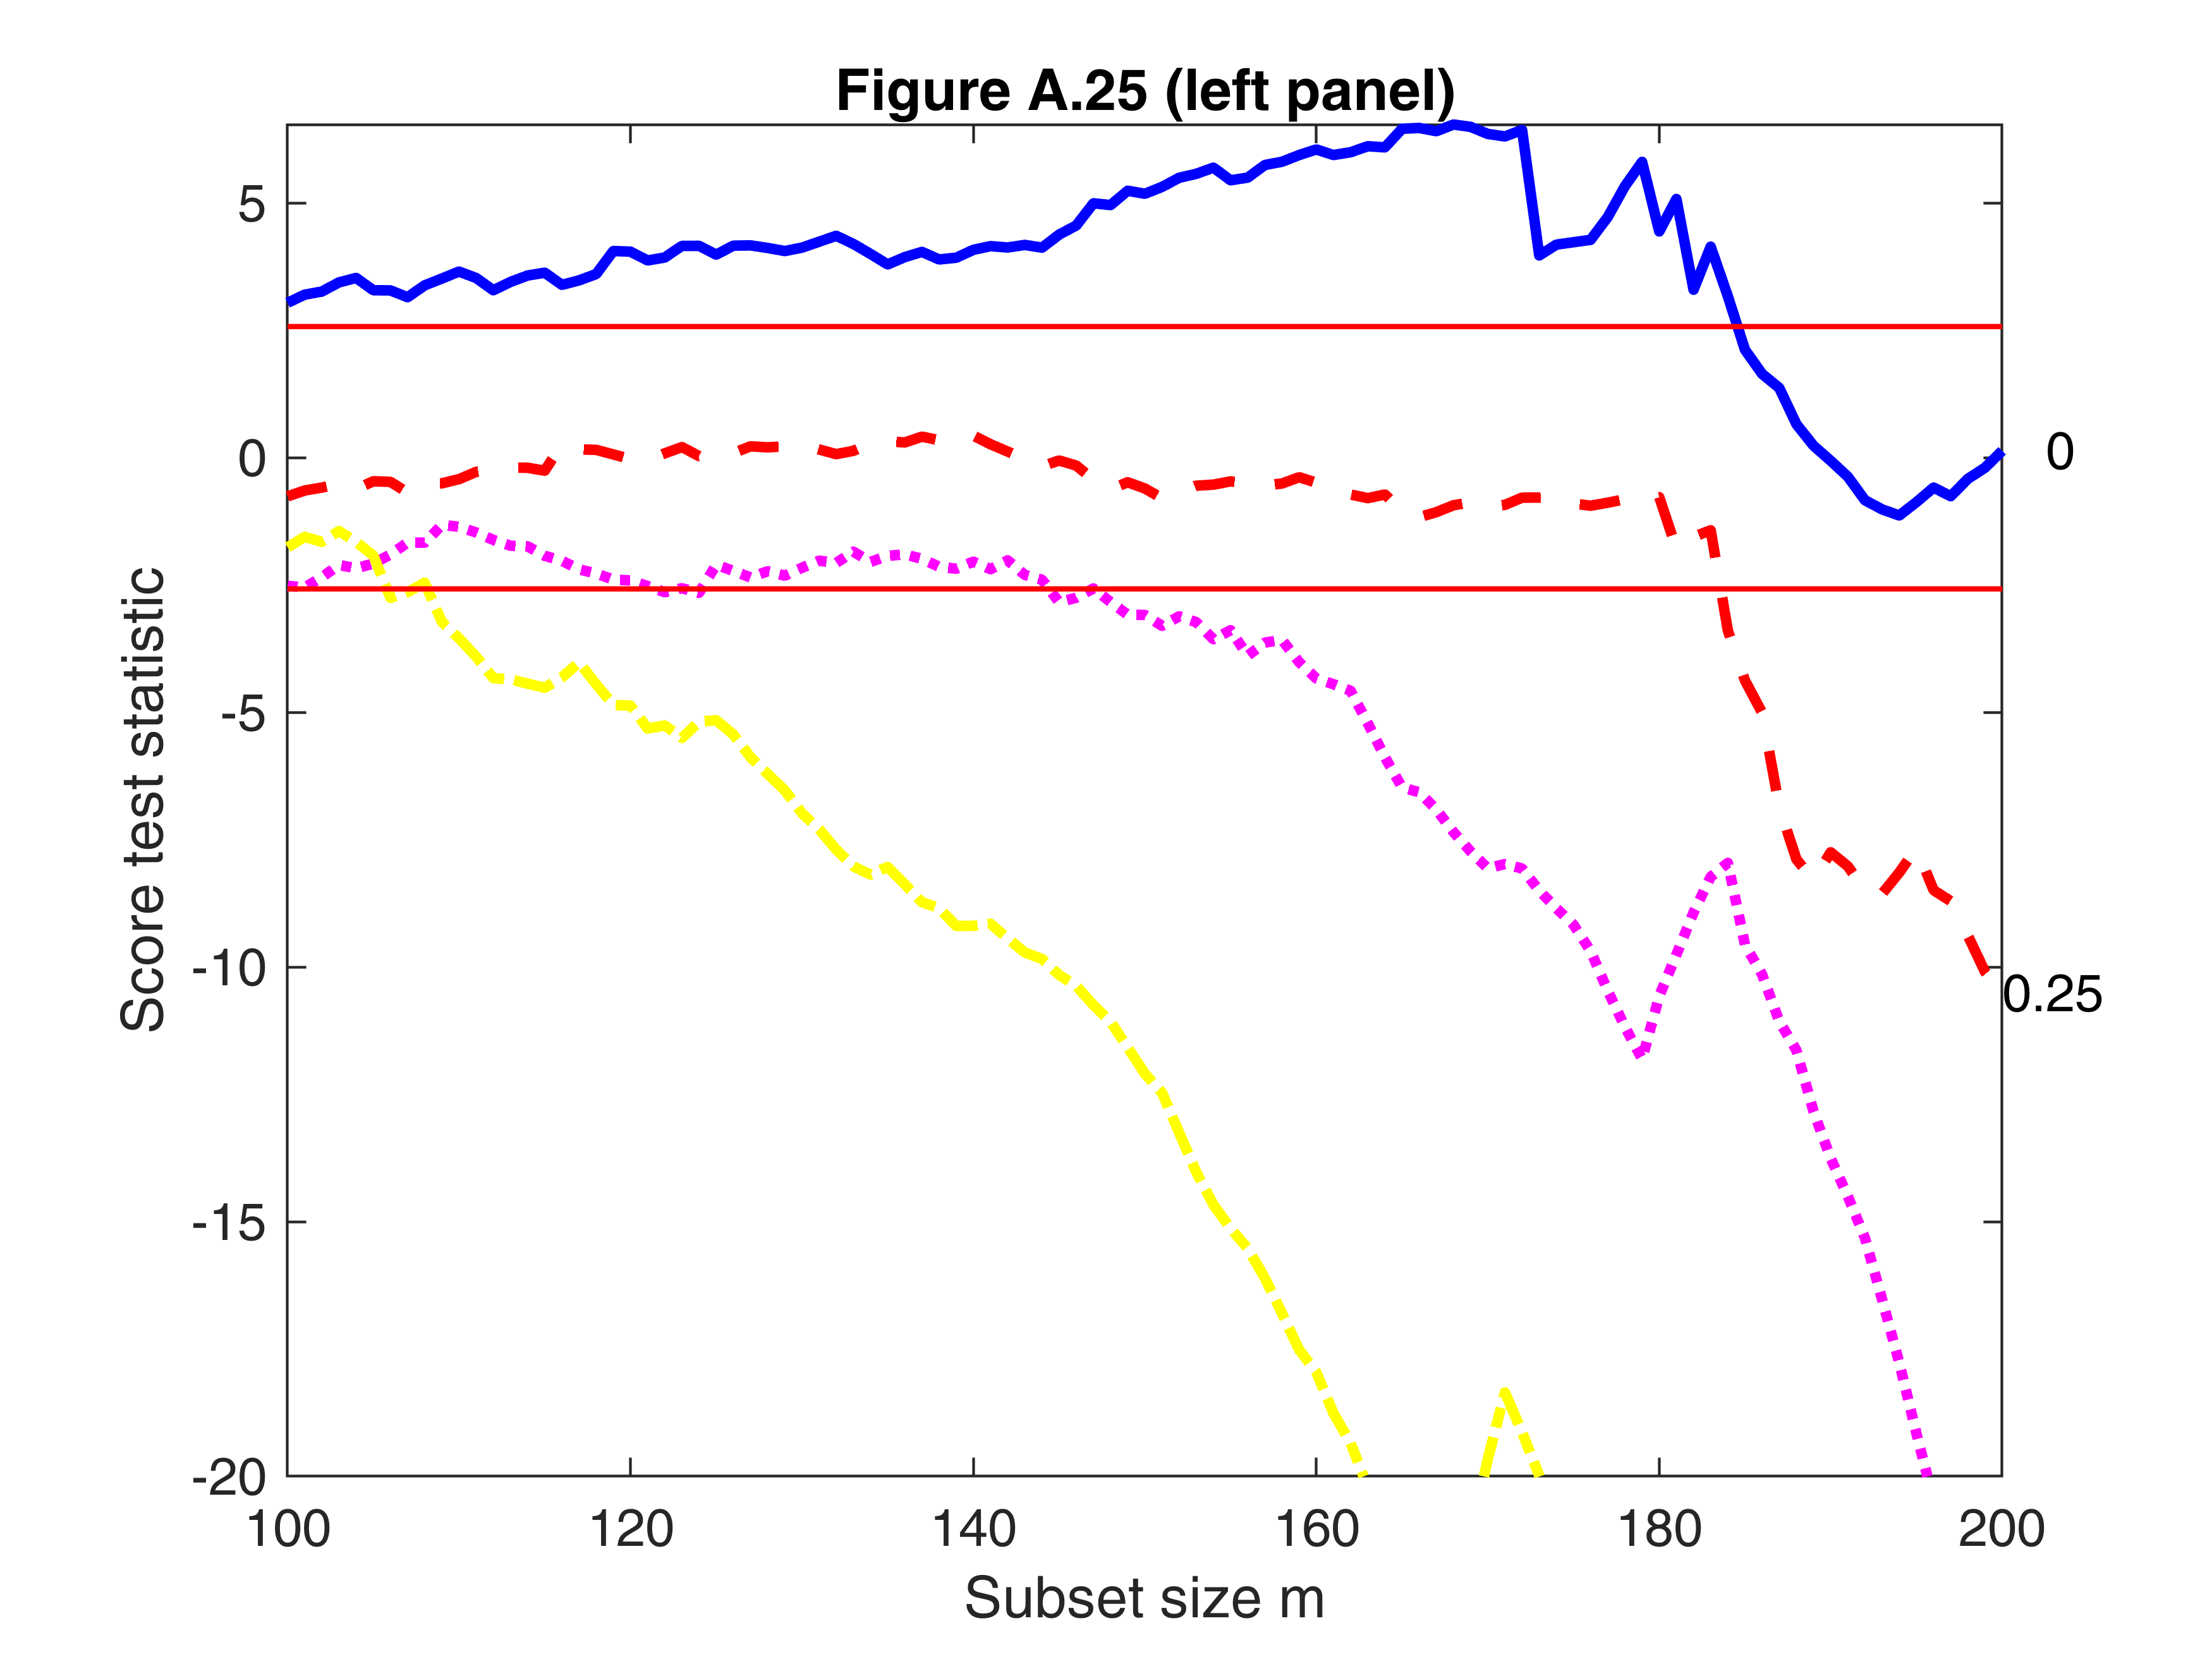

In [7]:
la=[0 0.25 0.5 1];
ylimy='';
out=FSRfan(y,X,'la',la,'family','YJ','plots',1,'init',round(n/2), 'ylimy',[-ylimy ylimy],'msg',0);

if prin==1
    print -depsc figs\D2fan.eps
else
    title('Figure A.25 (left panel)')
    set(gcf,"Name",'Figure A.25 (left panel)')

end

## Create Figure A.25 (right panel)

D2 fanplotpn



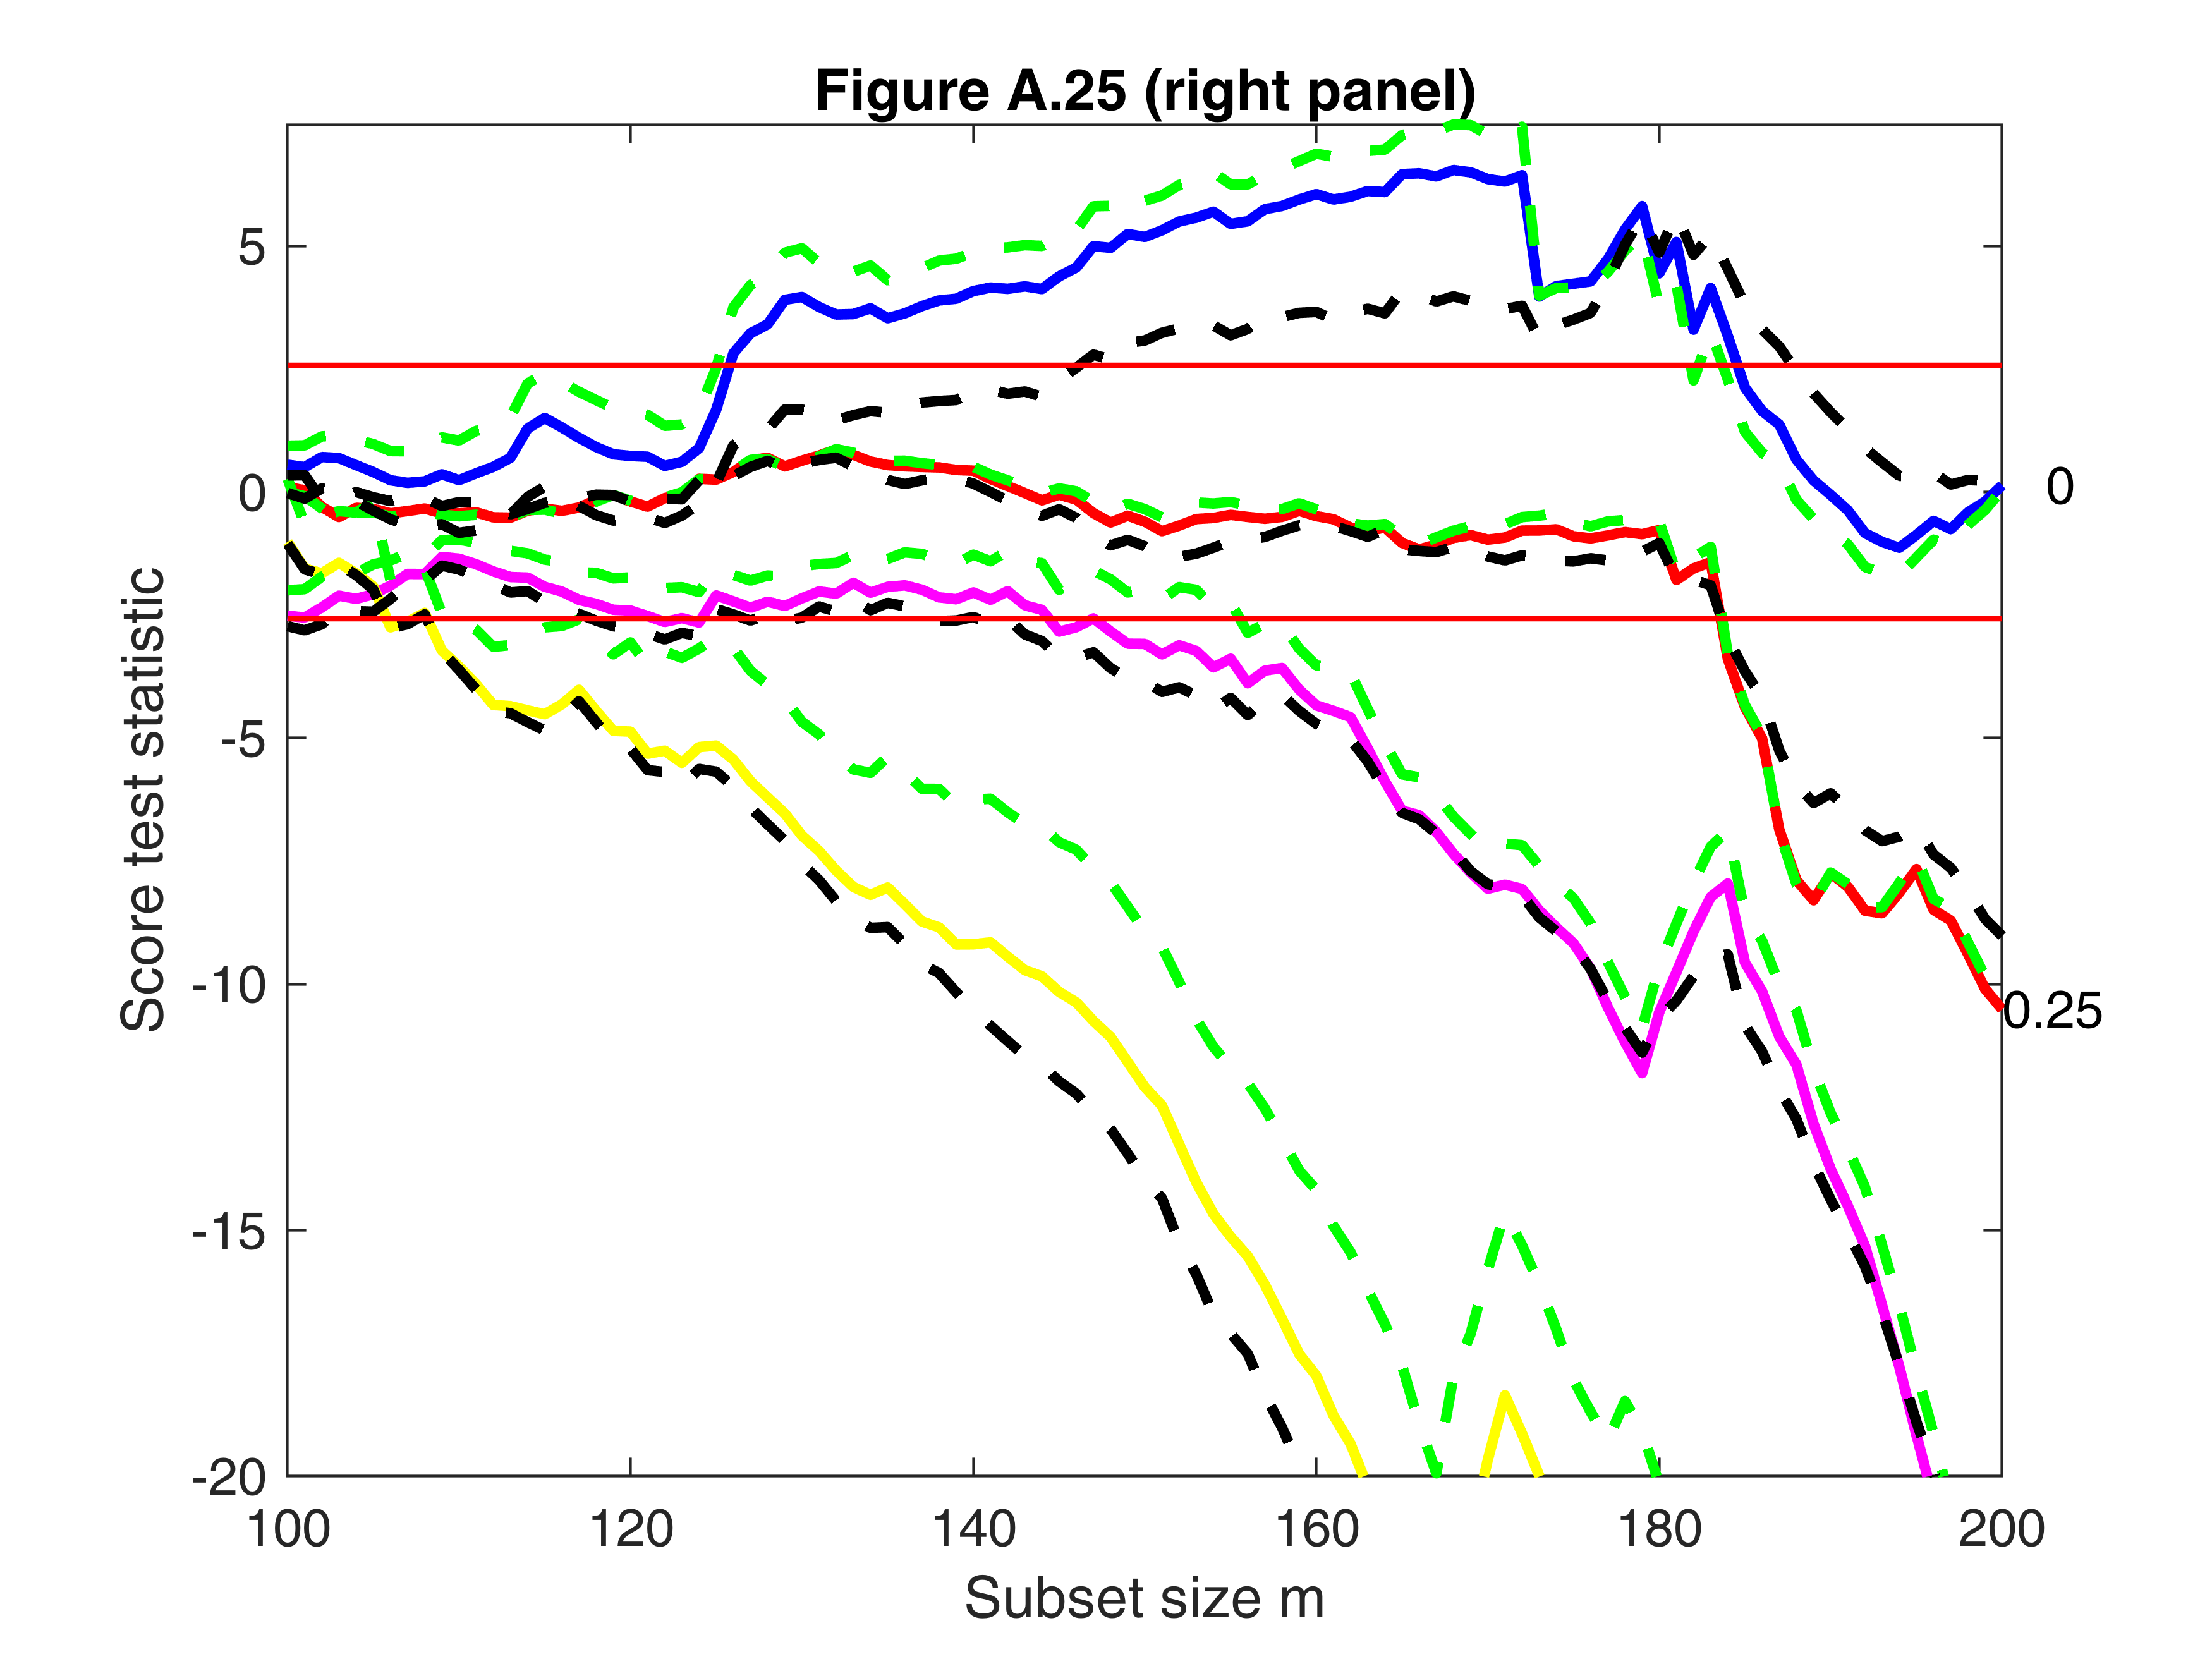

In [8]:
la=[0 0.25 0.5 1];
ylimy='';
out=FSRfan(y,X,'la',la,'family','YJpn','plots',1,'init',round(n/2), ...
    'ylimy',[-ylimy ylimy],'msg',0,'tag','pl_scopn');

if prin==1
    print -depsc D2fanpn.eps
else
    title('Figure A.25 (right panel)')
    set(gcf,"Name",'Figure A.25 (right panel)')
end

## Create Figure A.26

automatic procedure


In [9]:
[outFSRfan]=FSRfan(y,X,'plots',0,'init',round(n*0.3),'nsamp',10000,'la',-1:0.25:1,'msg',0,'family','YJ');
[outini]=fanBIC(outFSRfan,'plots',1);

% labest is the best value imposing the constraint that positive and
% negative observations must have the same transformation parameter.
disp('Automatic value of lambda (just on lambda)')

Automatic value of lambda (just on lambda)

In [10]:
labest=outini.labest;
disp(labest);

    0.2500


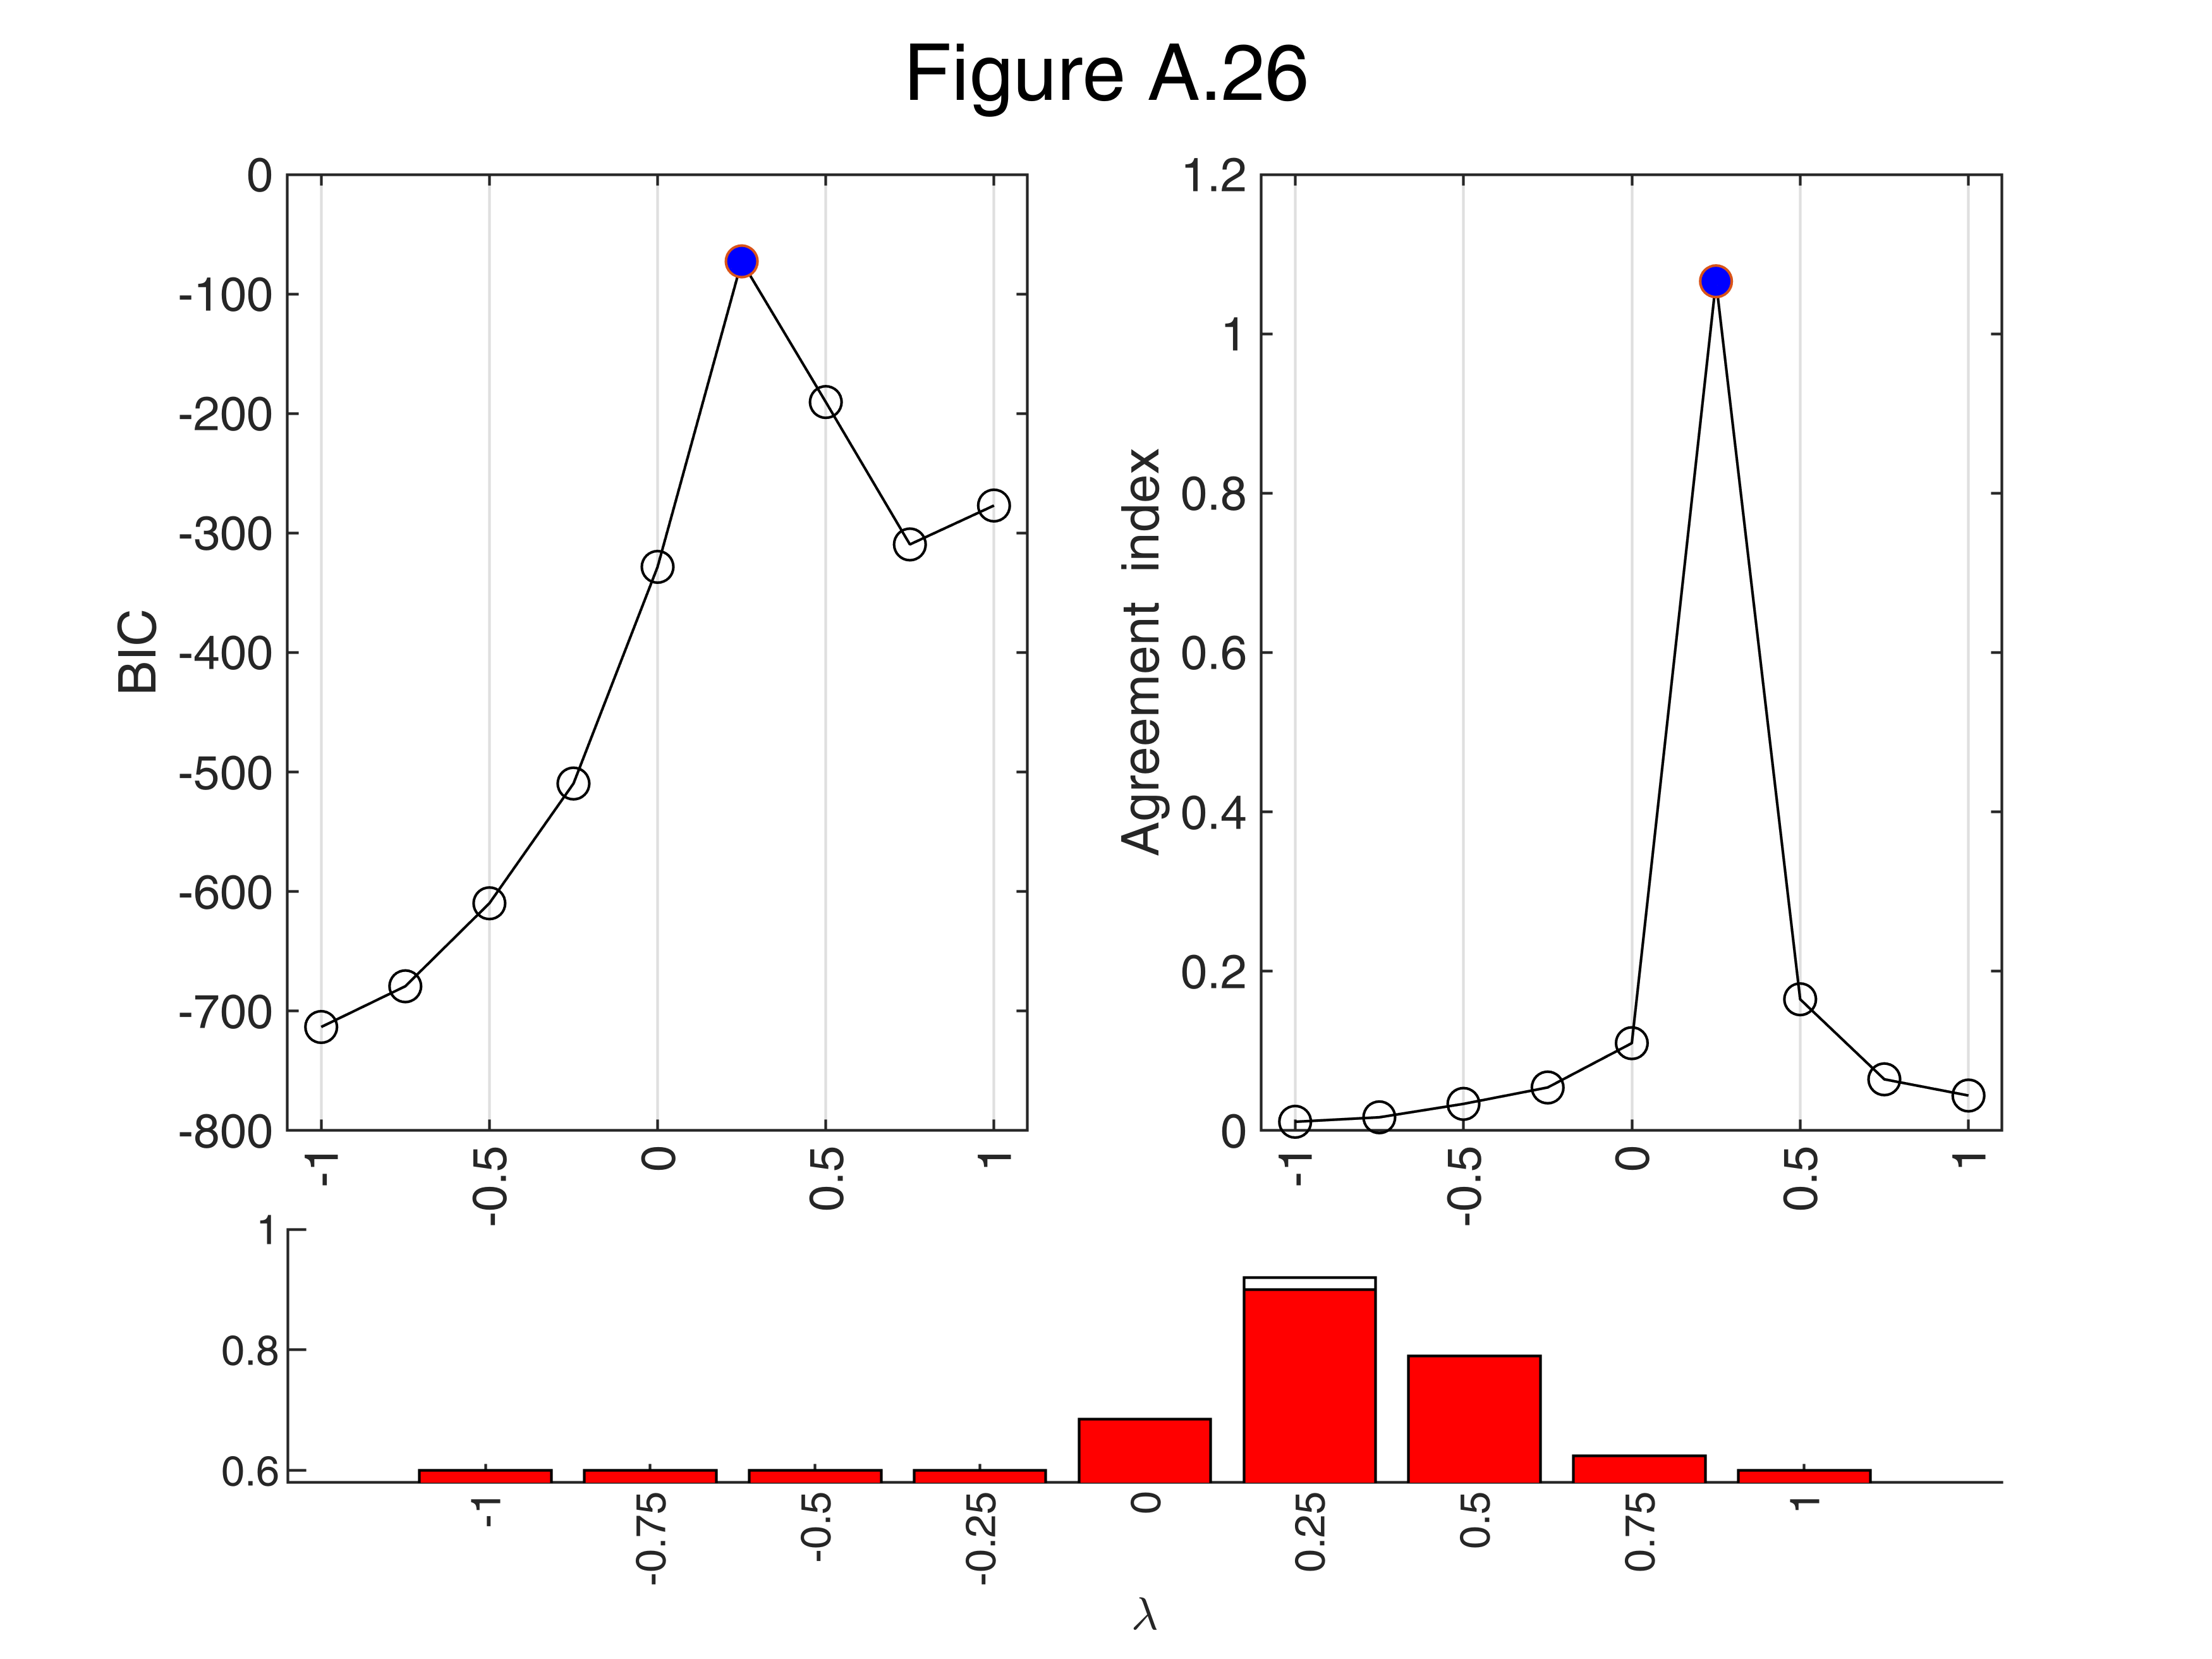

In [11]:

if prin==1
    % print to postscript
    print -depsc D2auto.eps;
else
    sgtitle('Figure A.26')
    set(gcf,"Name",'Figure A.26')
end

## Prepare input for Figure A.27

In [12]:
labest=0.25;
ytra=normYJ(y,[],labest,'inverse',false);
% FSR on ytra
outf=FSR(ytra,X,'plots',0,'init',n/2);

Observed curve of r_min is at least 10 times greater than 99.99% envelope
--------------------------------------------------
-------------------------
Signal detection loop
Tentative signal in central part of the search: step m=180 because
rmin(180,200)>99.999%
rmin(180,200)>99% at final step: Bonferroni signal in the central part of the search.
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=179
Superimposition stopped because r_{min}(180,181)>99% envelope
 !!!EQ_1!!! \% envelope
----------------------------
Final output
Number of units declared as outliers=20
Summary of the exceedances
           1          99         999        9999       99999
           0          24          21          17          17

## Create Figure A.27

yXplot after transforming y



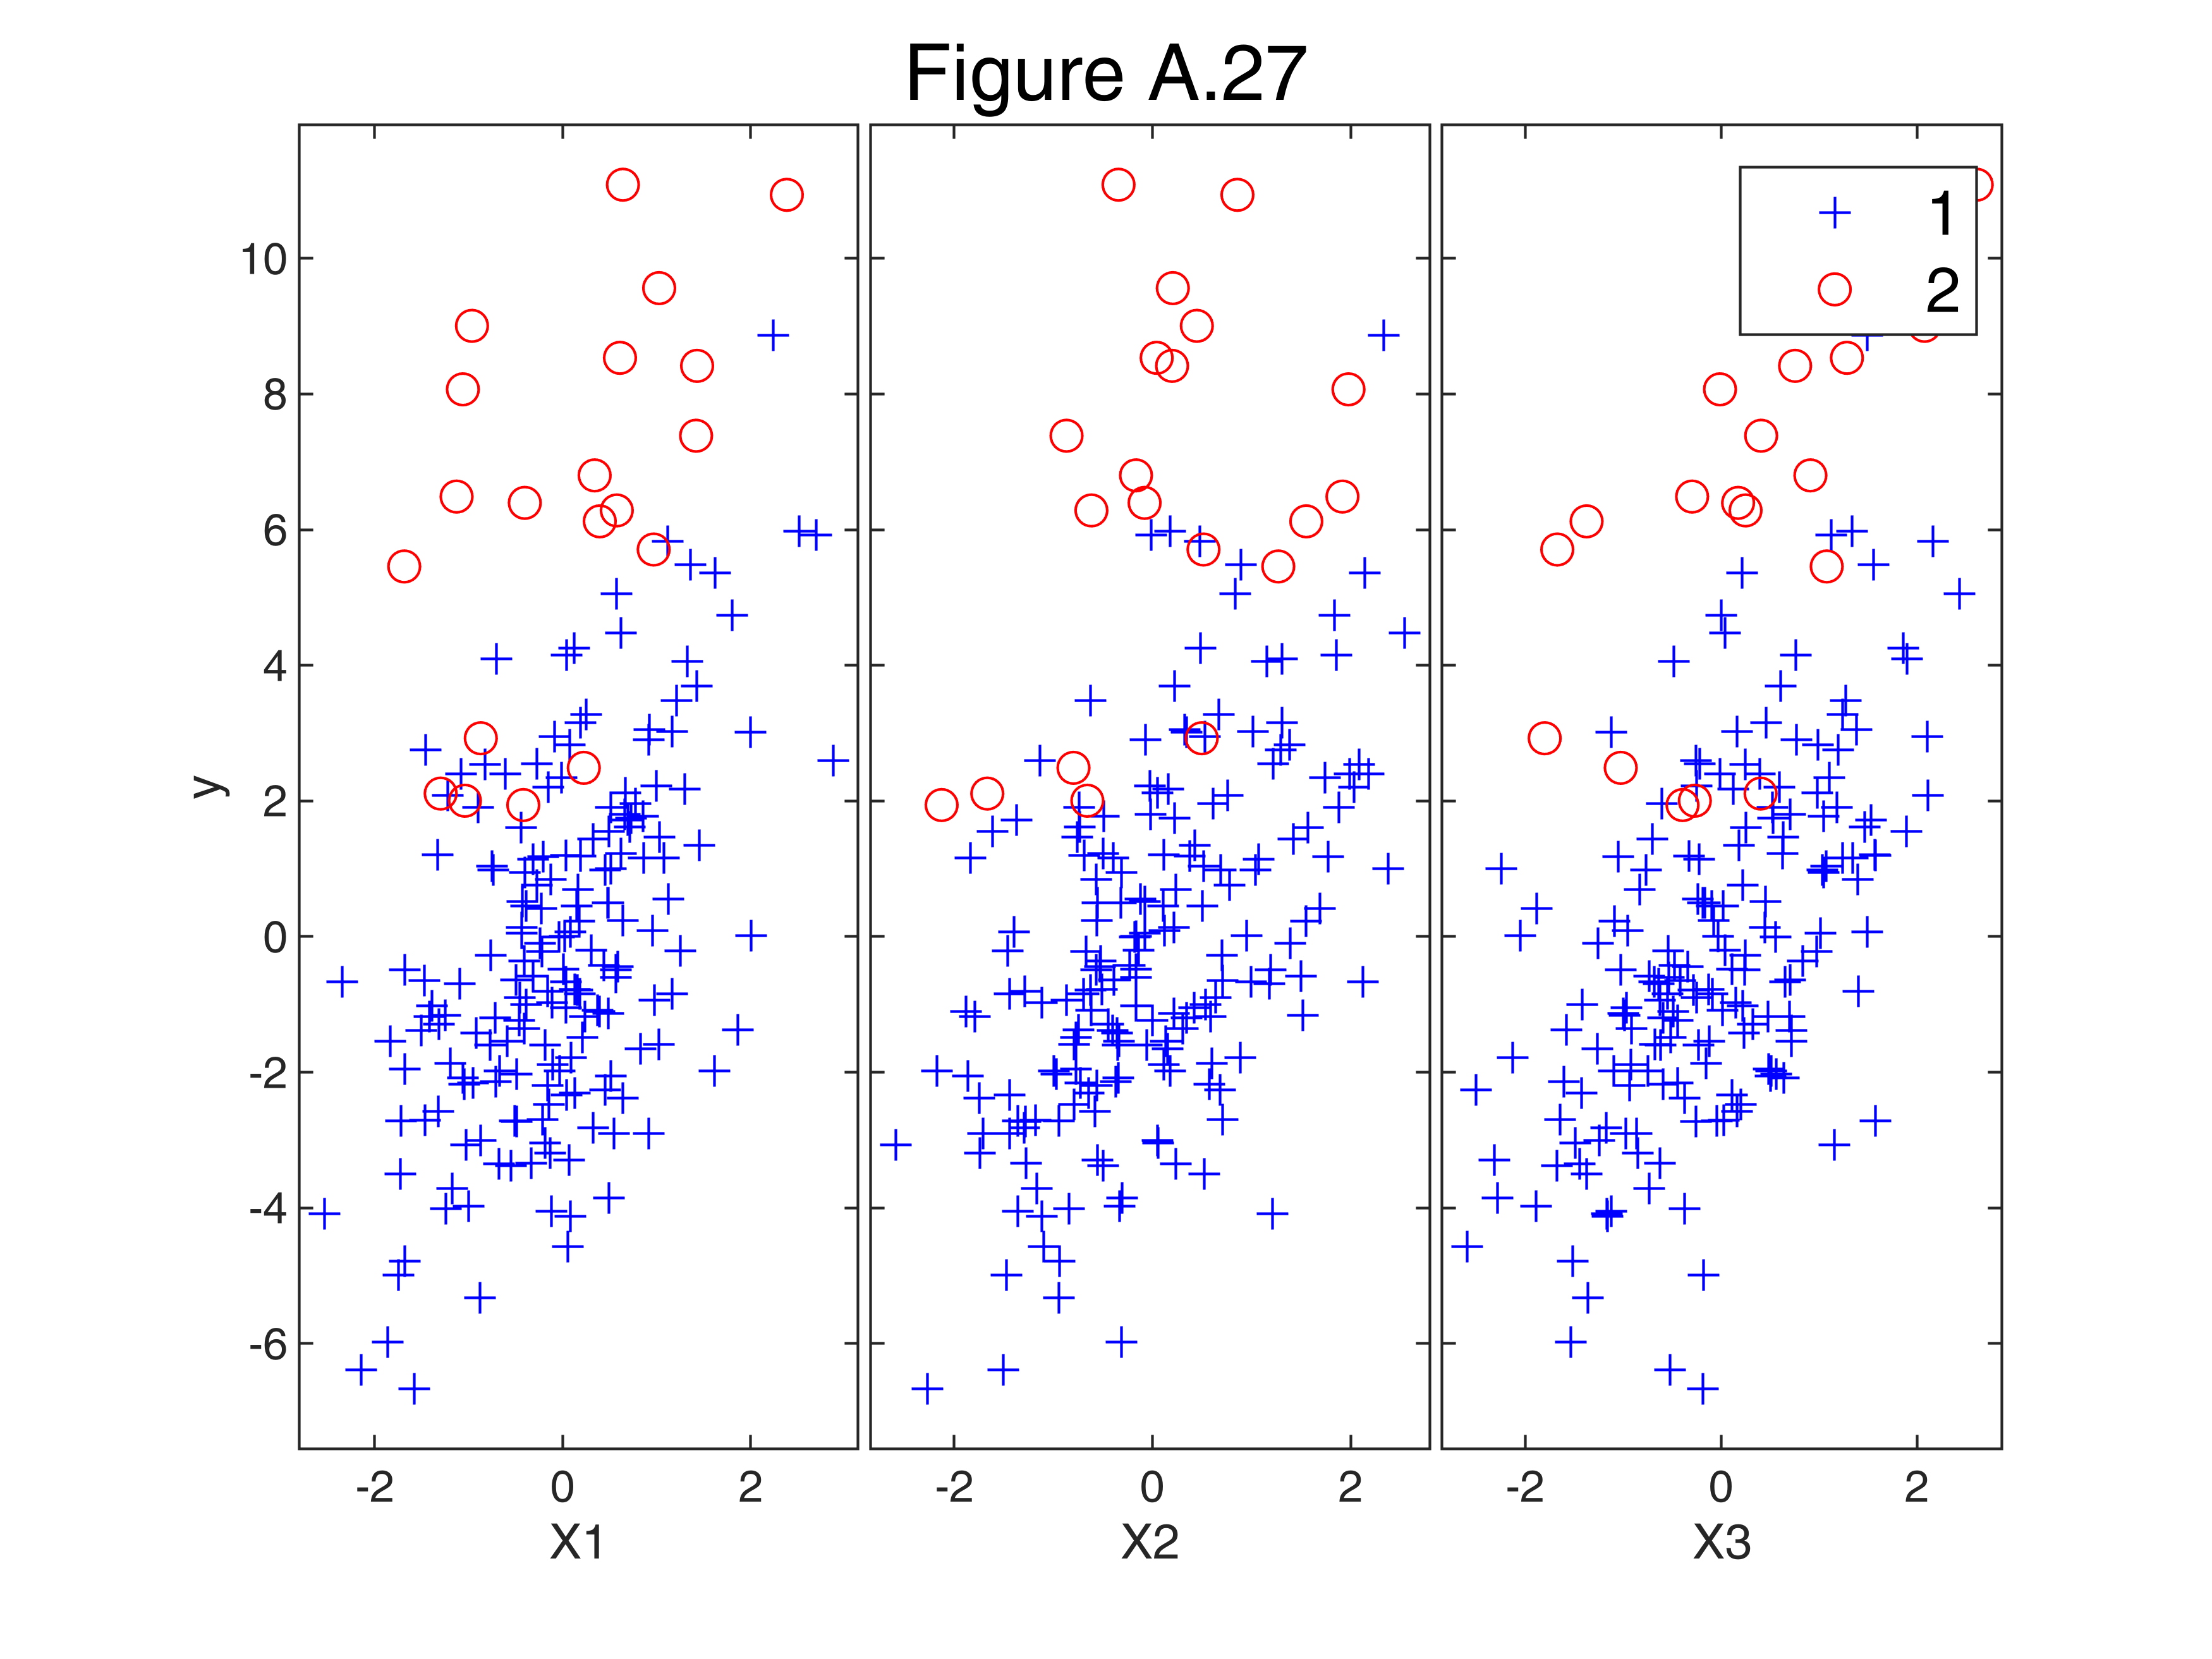

In [13]:
group=ones(n,1);
group(outf.outliers)=2;
yXplot(ytra,X,'group',group);

if prin==1
    print -depsc D2ytraX.eps
else
    sgtitle('Figure A.27')
    set(gcf,"Name",'Figure A.27')
end

## Create Table A.13

D2 anova table after transforming y


In [14]:
disp('Table A.13: ANOVA in the transformed scale for y (after removing the outliers)')

Table A.13: ANOVA in the transformed scale for y (after removing the outliers)

In [15]:
outTRA=fitlm(X,ytra,'Exclude',outf.outliers);
disp(outTRA)

Linear regression model:
    y ~ 1 + x1 + x2 + x3
Estimated Coefficients:
                   Estimate        SE        tStat        pValue  
                   _________    ________    ________    __________
    (Intercept)    -0.038855    0.051365    -0.75645       0.45039
    x1                1.4066    0.052119      26.989    1.8656e-64
    x2                1.3872    0.048197      28.782    1.8091e-68
    x3                1.3997    0.049318      28.381     1.382e-67
Number of observations: 180, Error degrees of freedom: 176
Root Mean Squared Error: 0.687
R-squared: 0.932,  Adjusted R-Squared: 0.931
F-statistic vs. constant model: 804, p-value = 1.94e-102

## Create Figures A.28 and A.29

heatmaps


In [16]:
[outFSRfanpn]=FSRfan(y,X,'msg',0,'family','YJpn','la',labest,'plots',0);
out1=fanBICpn(outFSRfanpn);

Analyzing la_P=0.25 and la_N=0.25
Analyzing la_P=0.25 and la_N=-0.5
Analyzing la_P=0.25 and la_N=-0.25
Analyzing la_P=0.25 and la_N=0
Analyzing la_P=0.5 and la_N=0.25
Analyzing la_P=0.5 and la_N=-0.5
Analyzing la_P=0.5 and la_N=-0.25
Analyzing la_P=0.5 and la_N=0
Analyzing la_P=0.75 and la_N=0.25
Analyzing la_P=0.75 and la_N=-0.5
Analyzing la_P=0.75 and la_N=-0.25
Analyzing la_P=0.75 and la_N=0
Analyzing la_P=1 and la_N=0.25
Analyzing la_P=1 and la_N=-0.5
Analyzing la_P=1 and la_N=-0.25
Analyzing la_P=1 and la_N=0


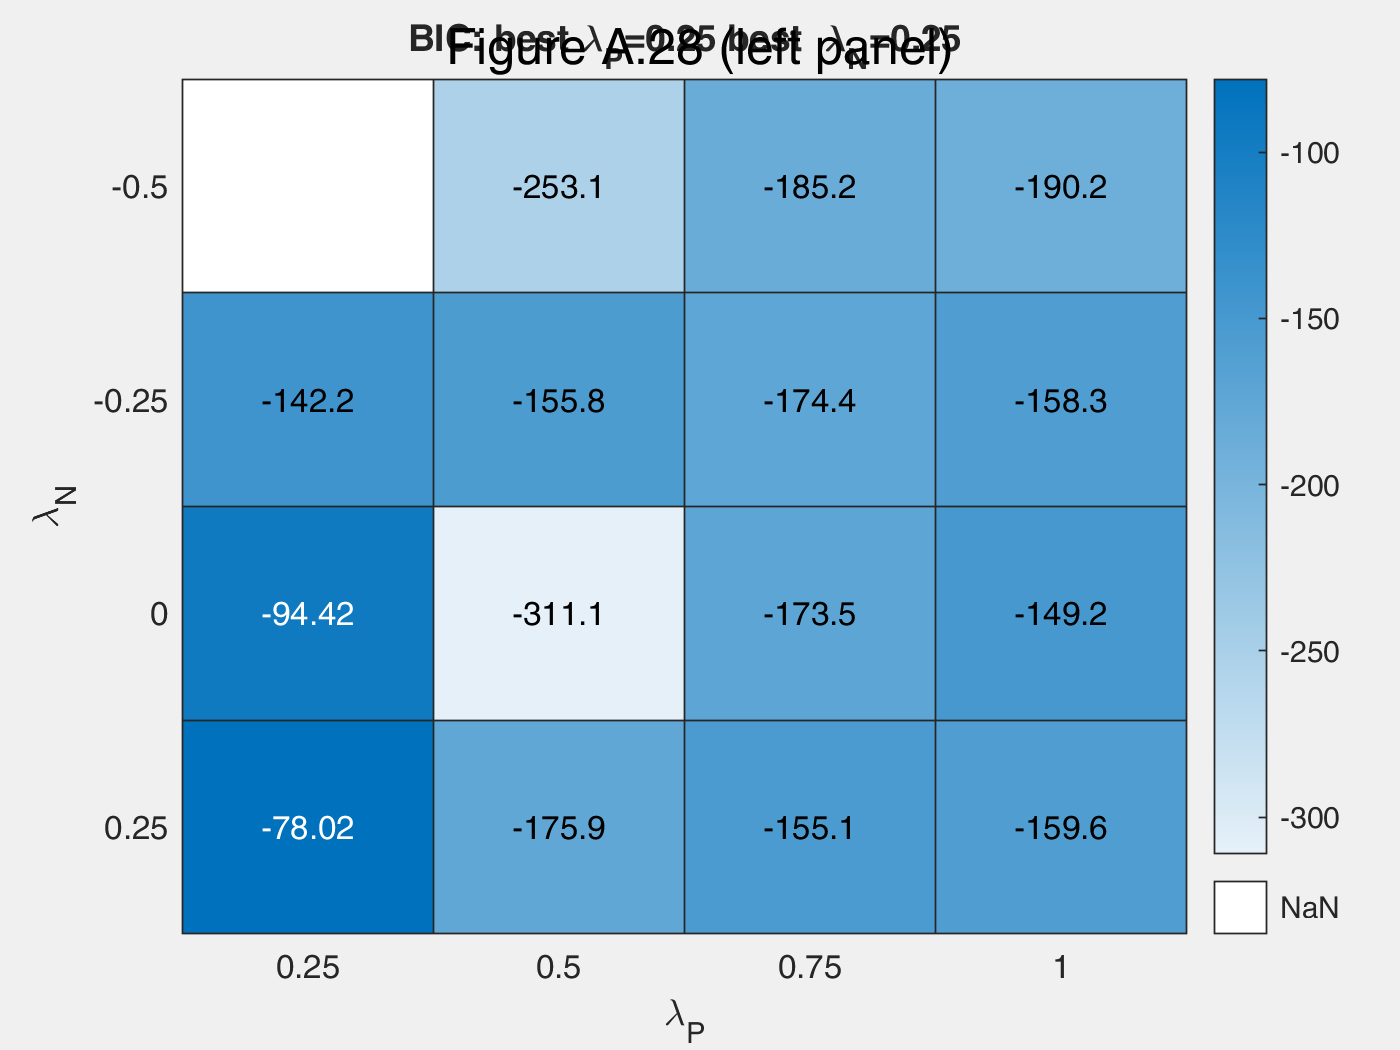

In [17]:

fig=findobj(0,'tag','pl_BIC');
figure(fig(1))
if prin==1
    % print to postscript
    print -depsc D2autopnBIC.eps;
else
    sgtitle('Figure A.28 (left panel)')
    set(gcf,'Name', 'Figure A.28 (left panel)');
end


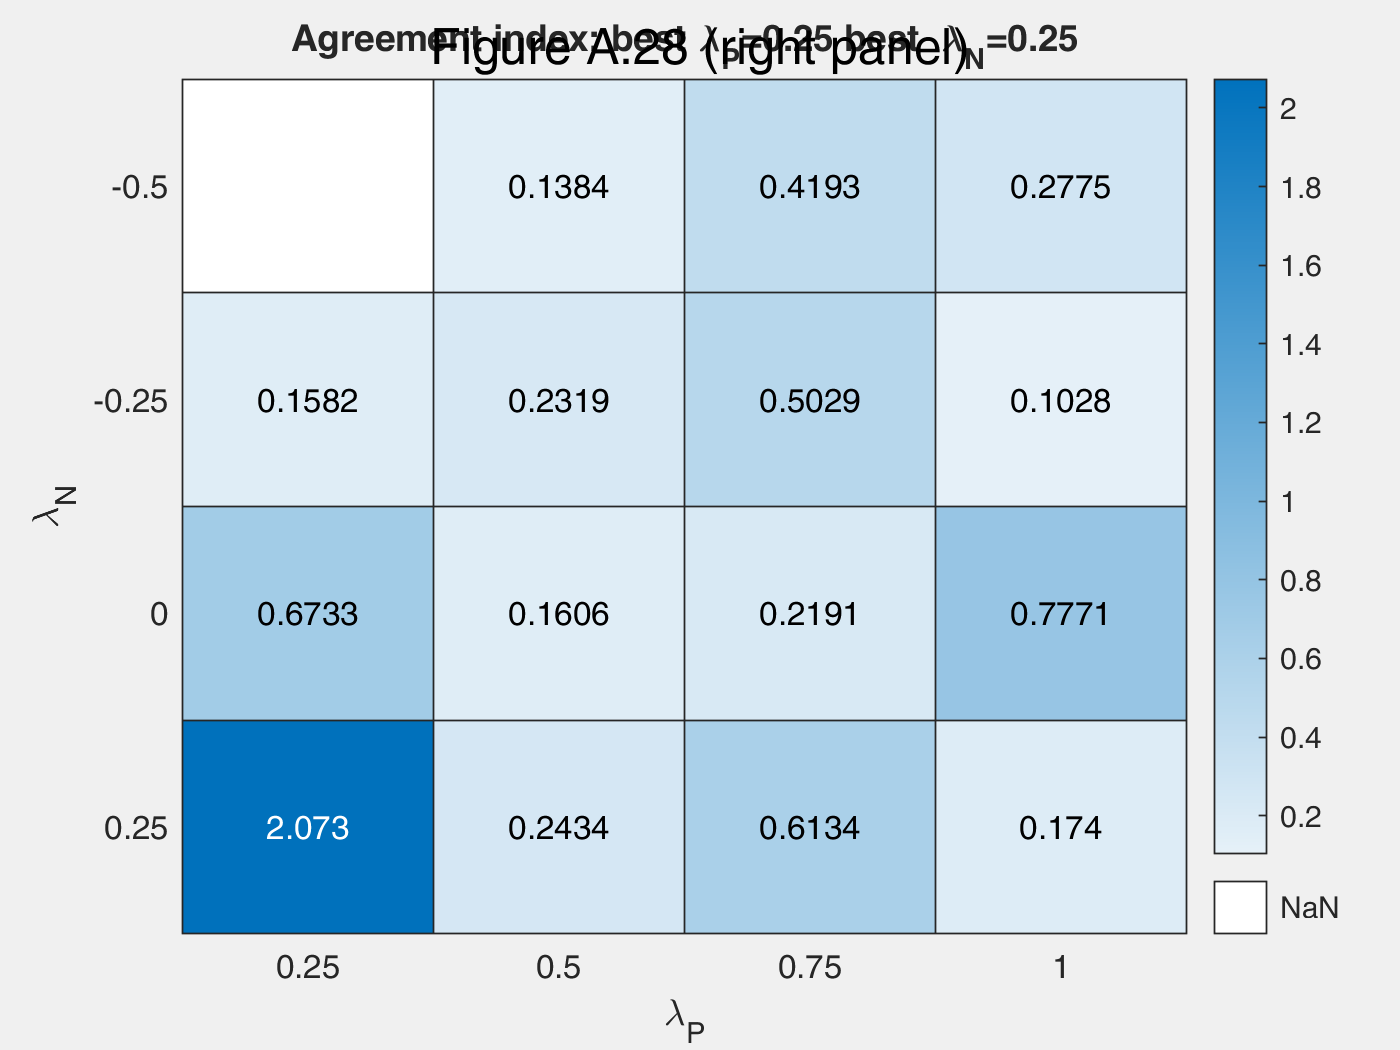

In [18]:

fig=findobj(0,'tag','pl_AGI');
figure(fig(1))

if prin==1
    % print to postscript
    print -depsc D2autopnh.eps;
else
    sgtitle('Figure A.28 (right panel)')
    set(gcf,'Name', 'Figure A.28 (right panel)');
end


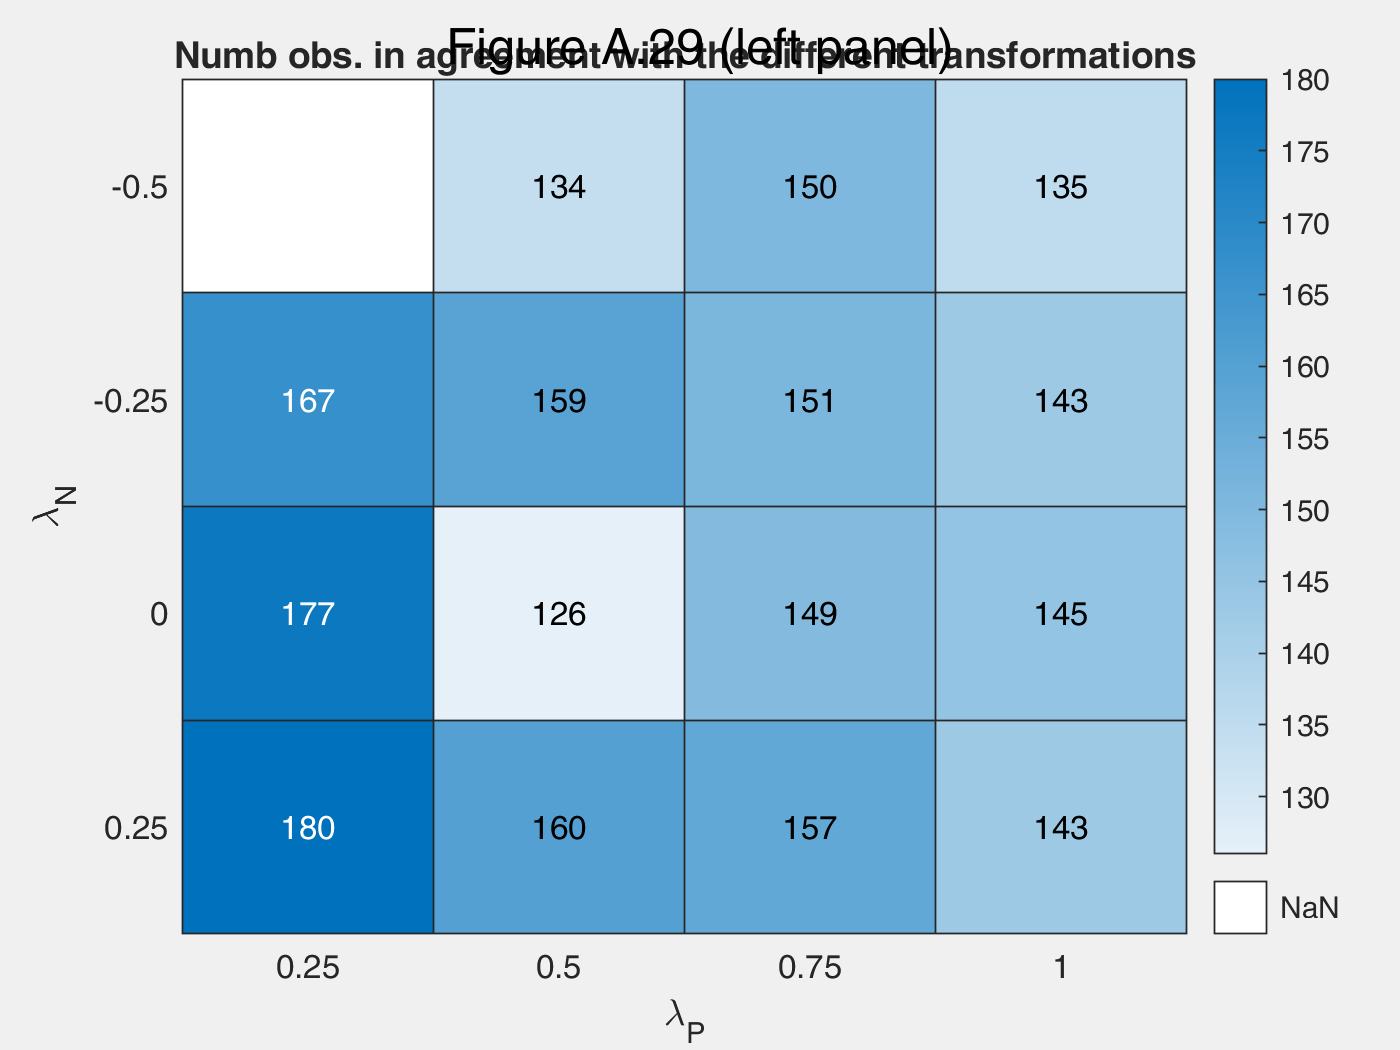

In [19]:

fig=findobj(0,'tag','pl_nobs');
figure(fig(1))
if prin==1
    % print to postscript
    print -depsc D2autopnh.eps;
else
    sgtitle('Figure A.29 (left panel)')
    set(gcf,'Name', 'Figure A.29 (left panel)');
end


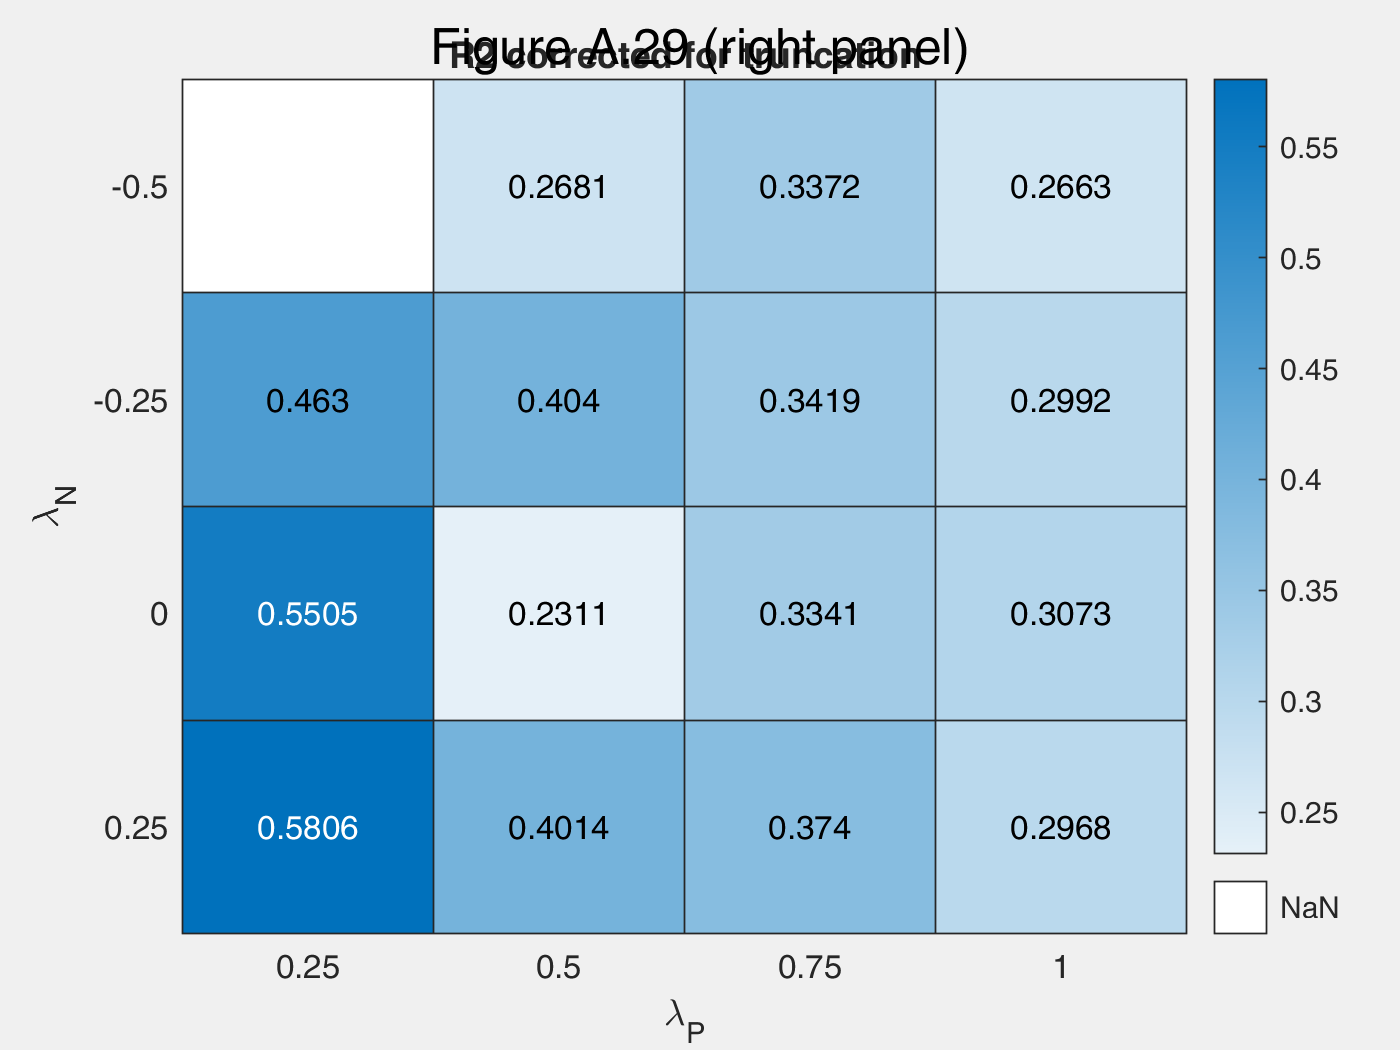

In [20]:

fig=findobj(0,'tag','pl_R2c');
figure(fig(1))

if prin==1
    print -depsc D2autopnR2.eps;
else
    sgtitle('Figure A.29 (right panel)')
    set(gcf,'Name', 'Figure A.29 (right panel)');
end

In [21]:

%InsideREADME